# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Load Model

Load the previously saved model named `improved_model.h5`, including its architecture, weights, and training configuration, for reuse in predictions or inference training.

In [2]:
# Load model
loaded_model = load_model('improved_model.h5')

# Load Data Inference

Preprocess images from the `inference_images` folder to prepare them as input for the model, resulting in a dataset of images ready for model inference.

In [3]:
# Path to the folder containing images
img_folder = 'inference_images'

# Preprocess images: resize, normalize, and prepare for inference
img_size = (224, 224)
batch_data = []
filenames = []

for img_name in os.listdir(img_folder):
    img_path = os.path.join(img_folder, img_name)
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    batch_data.append(img_array)
    filenames.append(img_name)

# Convert batch_data to a numpy array for model input
batch_data = np.array(batch_data)

# Model Prediction

Perform predictions on a batch of preprocessed images and map the class indices to class labels (or use for visualization)

In [4]:
# Perform predictions using the loaded model
predictions = loaded_model.predict(batch_data)

# Extract the predicted class indices
predicted_classes = np.argmax(predictions, axis=-1)

1/1 [==============================] - 1s 815ms/step


Map the model's prediction results to class names and calculate the highest probability for each image.

In [5]:
# Map predicted class indices to class names
class_indices = {
    0: 'american_goldfinch',
    1: 'barn_owl',
    2: 'carmine_bee_eater',
    3: 'downy_woodpecker',
    4: 'flamingo'
}
predicted_labels = [class_indices[cls] for cls in predicted_classes]  # Convert indices to labels

# Extract the highest probability for each prediction
probs = np.max(predictions, axis=-1)

Display the model's predictions visually, plot the images along with their predicted class names and probabilities.

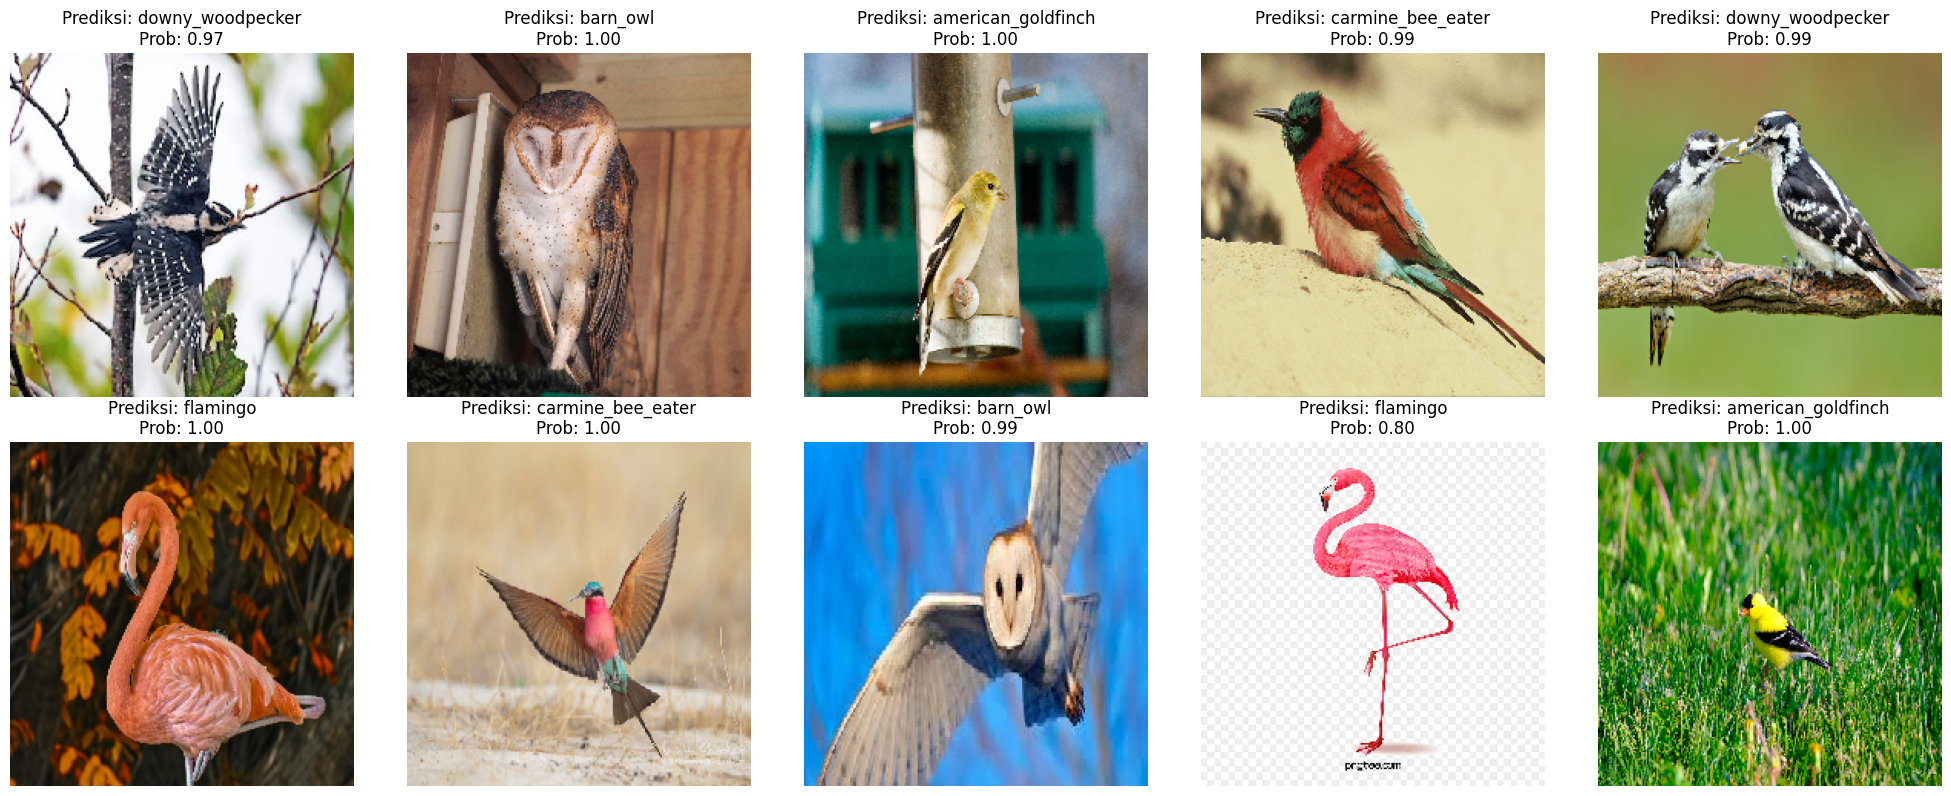

In [6]:
# Visualize prediction results
plt.figure(figsize=(20, 8))

# Display up to 10 images in a 2x5 grid
for i in range(len(batch_data)):
    plt.subplot(2, 5, i + 1)  # Arrange images in a 2x5 grid
    img = batch_data[i]
    plt.imshow(img)
    plt.axis('off')  # Remove axis for cleaner visualization
    plt.title(f"Prediction: {predicted_labels[i]}\nProb: {probs[i]:.2f}")  # Show predicted label and probability

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Insights from Prediction Visualization**
- All images were classified correctly according to their visible labels, demonstrating the model's exceptional ability to recognize patterns in the inference data.
- Most images were classified with very high probabilities, indicating the model’s strong confidence in its predictions.
- Consistent predictions across various bird species and diverse images show that the model can effectively identify key patterns, such as color, shape, and texture.

**Recommendations and Improvements**
- The lower probability (0.80) for the flamingo image with an artificial background suggests that the model may not be adequately trained on non-natural images.
- Enhancing the training dataset by adding more diverse bird images with varied backgrounds and poses, including artificial conditions (e.g., transparent or illustrated images), could improve the model's ability to classify non-natural images accurately.